In [17]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [18]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/breakable-bonds/"
print("data path: ", data_path)

level: level1 & tutorial name: breaking-a-carbon-nanotube
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/breaking-a-carbon-nanotube/breakable-bonds/


In [19]:
log = lammps_logfile.File(data_path + "log.lammps")
time_0 = log.get("Step", run_num=0)
energy_0 = log.get("TotEng", run_num=0) # Kcal/mol
time_1 = log.get("Step", run_num=1)
energy_1 = log.get("TotEng", run_num=1) # Kcal/mol
time_0 /= 2000 # ps
time_1 /= 2000 # ps

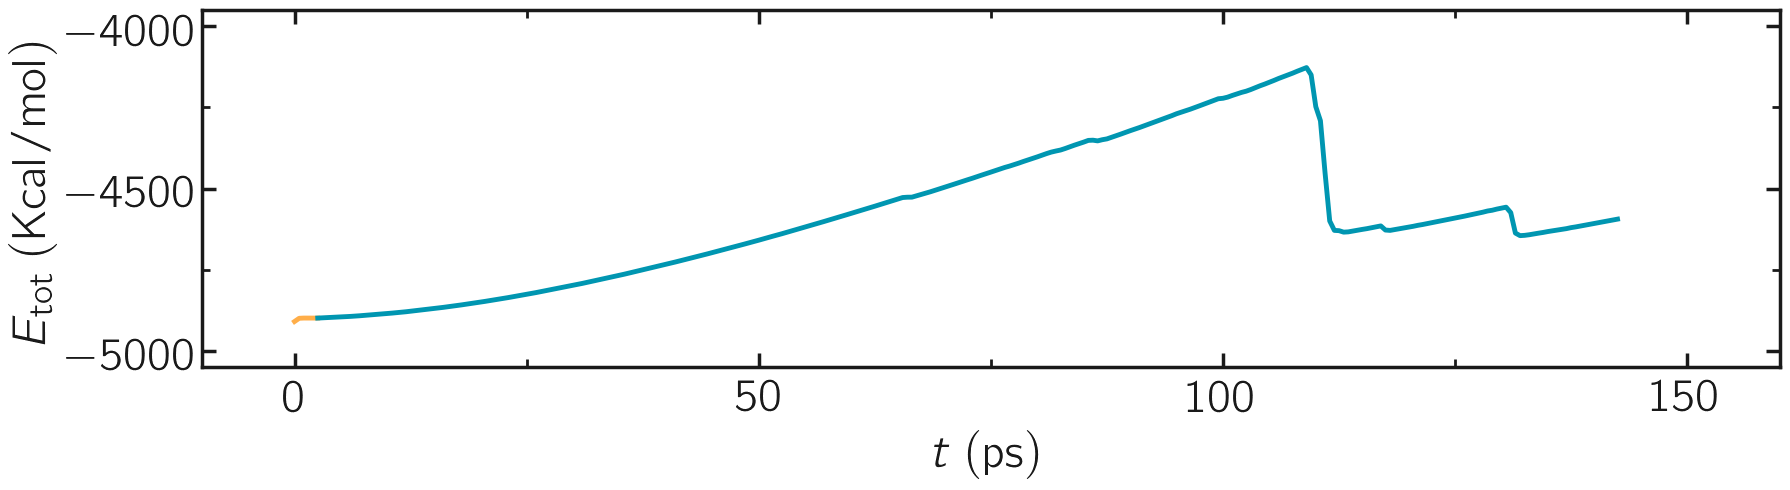

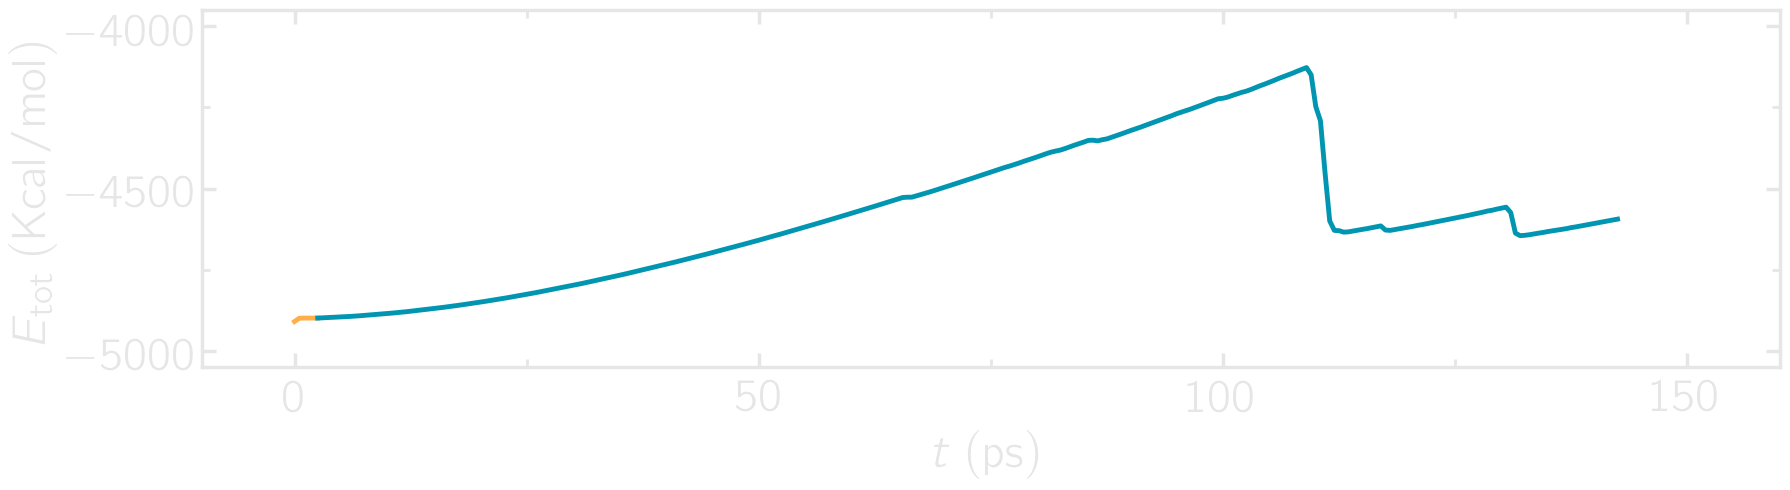

In [20]:
filename = "energy-breakable"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,5))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time_0, energy_0, color=colors["myorange"], linewidth=3.5)
    ax[-1].plot(time_1, energy_1, color=colors["myblue"], linewidth=3.5)
    complete_panel(ax[-1], r'$t~\mathrm{(ps)}$', r'$E_\mathrm{tot} ~ \mathrm{(Kcal/mol)}$',
                   legend=False, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(0, 160, 50), y_ticks=np.arange(-5000, -3500, 500),
                   x_boundaries=(-10, 160), y_boundaries=(-5050, -3950))
    save_figure(plt, fig, mode, git_path, path_figures, filename)

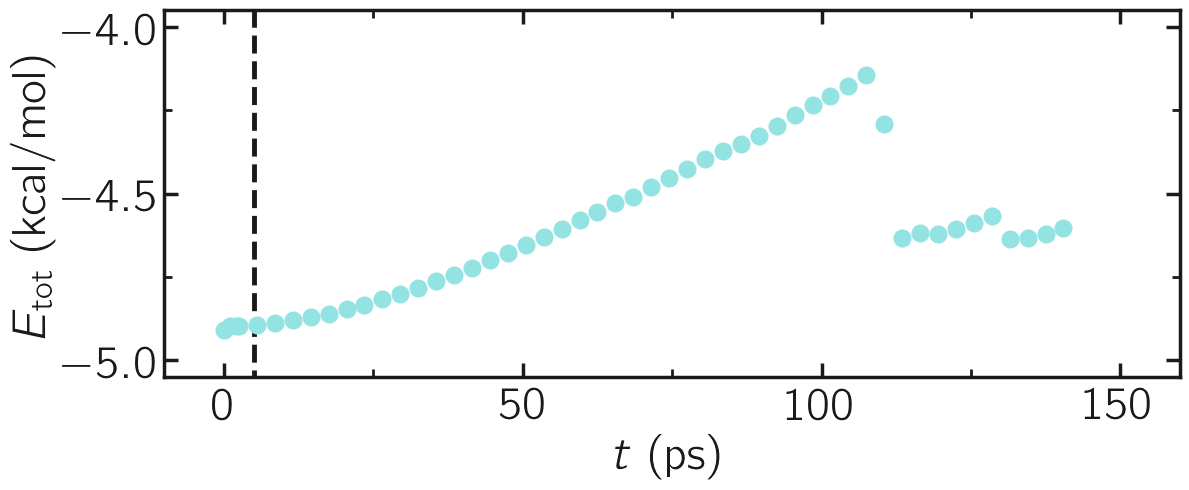

In [21]:
filename = "energy-breakable-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5), serif=False)
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(time_0[::2], energy_0[::2]/1000, 'o', color=colors["unisoncyan"], linewidth=3.5, markersize=12)
x = np.linspace(-6, -3)
ax[-1].plot(x*0+5, x, "--", color=colors["mylightgray"], markersize=12, linewidth=3.5)
ax[-1].plot(time_1[::6], energy_1[::6]/1000, 'o', color=colors["unisoncyan"], linewidth=3.5,  markersize=12)
complete_panel(ax[-1], r'$t~\mathrm{(ps)}$', r'$E_\mathrm{tot} ~ \mathrm{(kcal/mol)}$',
                legend=False, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(0, 160, 50), y_ticks=np.arange(-5, -3.5, 0.5),
                x_boundaries=(-10, 160), y_boundaries=(-5.050, -3.950))
save_figure(plt, fig, mode, git_path, path_figures, filename)